# FINA

## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [1]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests #this is for performing the pairwise tests


#import generic_funcions as gf
#import adherence_functions as af
import warnings
warnings.filterwarnings('ignore')

ruta_archivos = ''

## 2. Carga de Datos

In [2]:
base = pd.read_csv( ruta_archivos + 'base_adeherencia_features_0.csv', sep='|' )
base.head()

,id,year,month,adeherencia_0,key,far_rea_asma_sum_6,far_rea_total_sum_6,far_evo_aun_sum_6,far_cau_def_sum_6,far_cau_otra_sum_6,...,hab_alcohol_avg_12,hab_cigarrillo_avg_12,hab_ejercicio_avg_12,inc_con_sum_6,inc_inc_sum_6,inc_con_sum_12,inc_inc_sum_12,imc_avg_6,imc_avg_12,imc_foto
0,500547,2016,7,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3.0,0.0,3.0,NaN,NaN,NaN
1,500547,2019,3,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500547,2019,10,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN
3,500547,2019,12,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN
4,500547,2020,1,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN


In [3]:
totdas_var = base.columns[5:]

In [4]:
quedan = []
for i in base.columns[5:]:
    ## A simple t test for difference of means
    t2, p2 = stats.ttest_ind(base.loc[base['adeherencia_0'] == 0, i].dropna(),base.loc[base['adeherencia_0'] == 1, i].dropna())
    if p2<0.05:
        quedan.append(i)


In [5]:
quedan

['far_gra_leve_sum_6',
 'far_mis_si_flag',
 'hos_uce_sum_6',
 'hos_uce_j_sum_6',
 'hos_est_sum_6',
 'hos_est_j_sum_6',
 'hos_uce_sum_12',
 'hos_uce_j_sum_12',
 'med_num_dis_sum_6',
 'med_flag_otra_sum_6',
 'med_num_doses_otra_avg_6',
 'med_num_dis_sum_12',
 'med_flag_otra_sum_12',
 'med_num_doses_otra_avg_12',
 'acd_uso_inhal_avg_12',
 'ant_j_sum_12',
 'anf_j_sum_12',
 'epo_4_sum_6',
 'epo_4_sum_12',
 'inc_inc_sum_6',
 'inc_inc_sum_12']

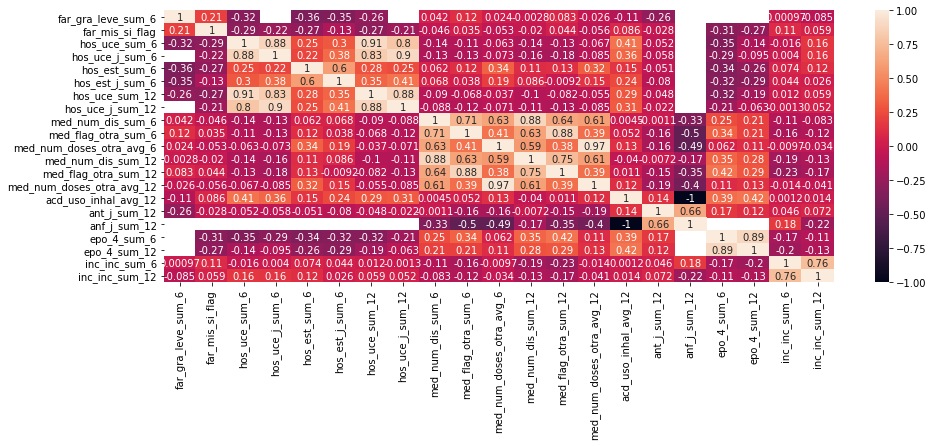

In [6]:
corrMatrix = base[quedan].corr()
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(corrMatrix, annot=True, )
plt.show()


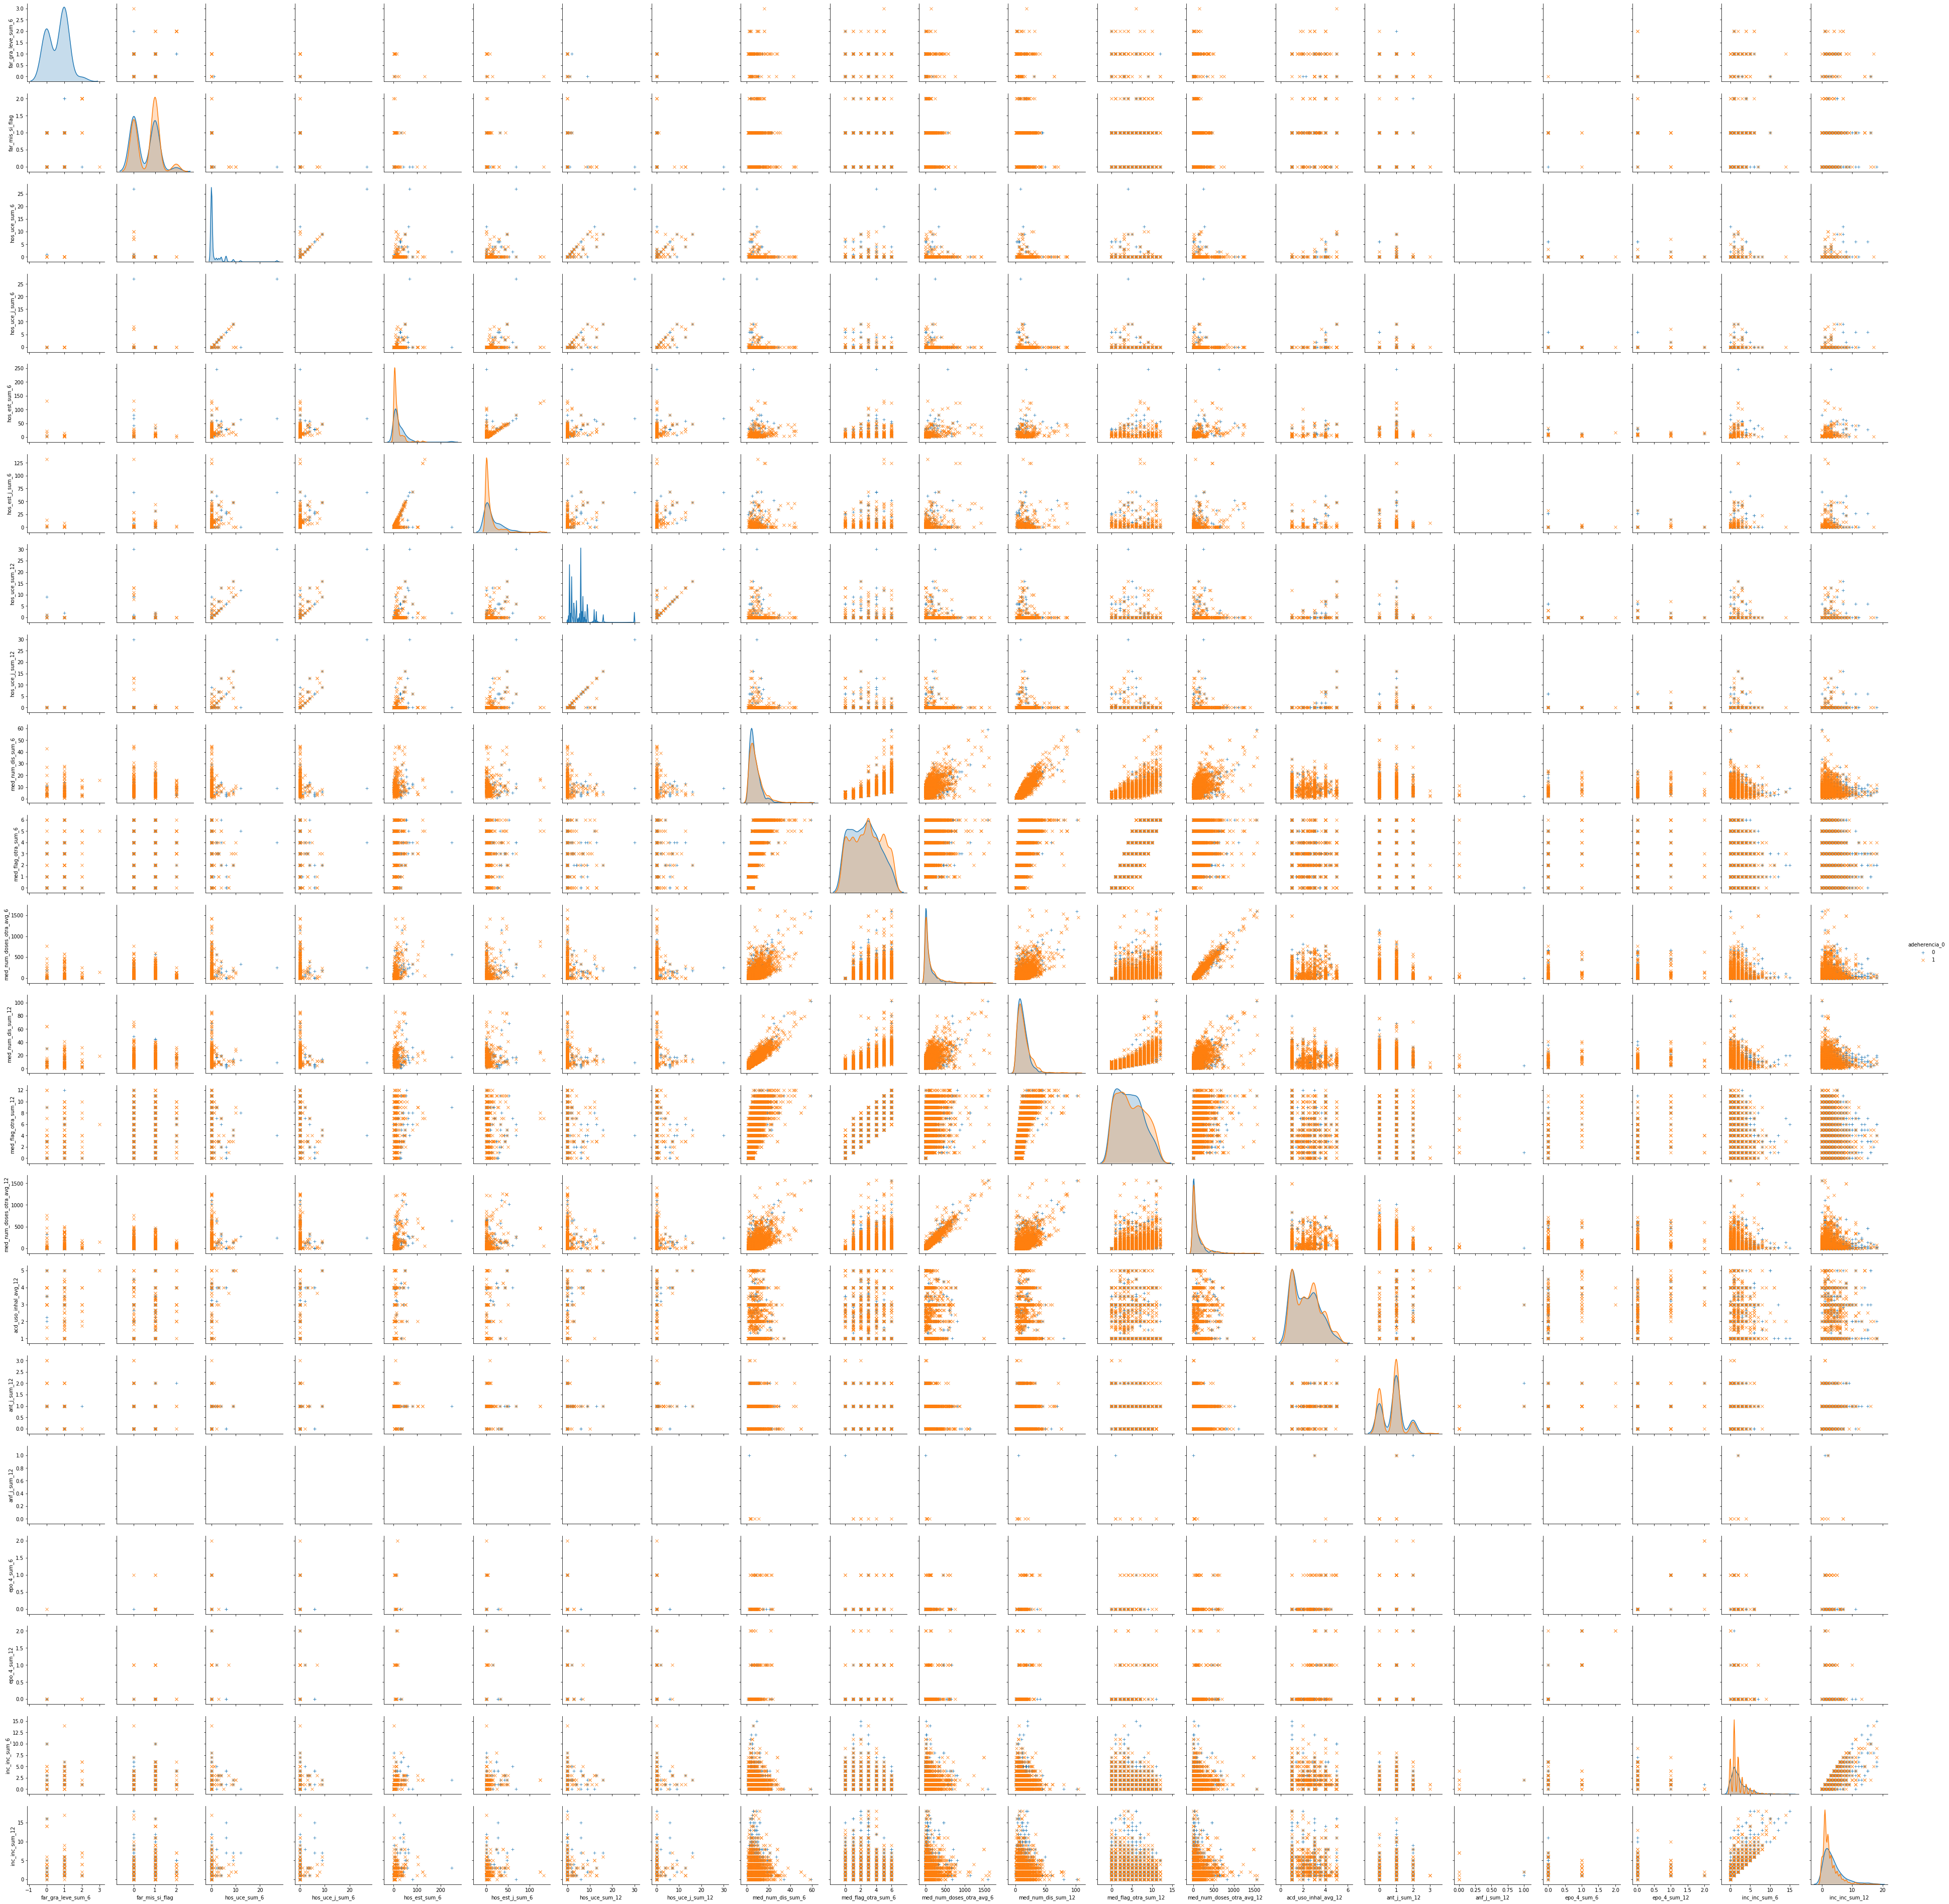

In [7]:
g = sns.pairplot(base[quedan + ['adeherencia_0']], hue="adeherencia_0", markers=["+", "x"])

##  Arbol

In [8]:
# Será util numpy.argsort(vals)

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


base_ = base.fillna(-1)
print(base_.shape)
X = base_[base.columns[5:]] # Features
y = base_['adeherencia_0'] # Target variable

(3663, 151)


In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3)

# Train Decision Tree Classifer
clf = clf.fit(X,y)

In [10]:
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'importance'})
importances.reset_index(inplace = True)

In [11]:
importances[importances['importance'] > 0].sort_values('importance', ascending = False)

,index,importance
142,inc_inc_sum_12,0.408695
60,med_flag_j_sum_12,0.338695
145,imc_foto,0.160102
55,med_flag_j_sum_6,0.073643
90,act_punt_control_avg_12,0.018865


# Gente en 3 años

<img src=Captura.png width="700">
15:10

In [12]:
id2017 = base[base['year'] == 2017]['id'].unique()
id2018 = base[base['year'] == 2018]['id'].unique()
id2019 = base[base['year'] == 2019]['id'].unique()

mask = np.isin(id2019,id2018[np.isin(id2018,id2017)])
id_final = id2019[mask]

In [13]:
base_3 = base[base['id'].isin(id_final)]

### Prueba `t`

In [14]:
quedan3 = []
for i in base_3.columns[5:]:
    ## A simple t test for difference of means
    t2, p2 = stats.ttest_ind(base_3.loc[base_3['adeherencia_0'] == 0, i].dropna(),base_3.loc[base_3['adeherencia_0'] == 1, i].dropna())
    if p2<0.05:
        quedan3.append(i)

In [15]:
quedan3

['far_gra_leve_sum_6',
 'far_gra_mod_sum_6',
 'far_cau_otra_sum_12',
 'hos_uce_sum_6',
 'hos_uce_j_sum_6',
 'hos_est_sum_6',
 'hos_est_j_sum_6',
 'hos_uce_sum_12',
 'hos_uce_j_sum_12',
 'med_num_dis_sum_6',
 'med_flag_otra_sum_6',
 'med_num_doses_j_avg_6',
 'med_num_doses_otra_avg_6',
 'med_num_dis_sum_12',
 'med_flag_otra_sum_12',
 'med_num_doses_j_avg_12',
 'med_num_doses_otra_avg_12',
 'cal_ent_foto',
 'ant_j_sum_12',
 'bio_omalizumab_avg_6',
 'epo_4_sum_6',
 'epo_4_sum_12',
 'inc_inc_sum_6',
 'inc_inc_sum_12']

In [16]:
len(list(set(quedan) & set(quedan3)))

18

###  Arbol

In [17]:
base_ = base_3.fillna(-1)
print(base_.shape)
X = base_[base.columns[5:]] # Features
y = base_['adeherencia_0'] # Target variable

(1747, 151)


In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3)

# Train Decision Tree Classifer
clf = clf.fit(X,y)

In [19]:
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'importance'})
importances.reset_index(inplace = True)

In [20]:
importances[importances['importance'] > 0].sort_values('importance', ascending = False)

,index,importance
92,acd_ef_act_usu_avg_6,0.264780
142,inc_inc_sum_12,0.243140
60,med_flag_j_sum_12,0.133335
94,acd_falta_aire_avg_6,0.115077
56,med_flag_otra_sum_6,0.099096
62,med_num_doses_j_avg_12,0.077776
139,inc_con_sum_6,0.066797


---------------------------------------------------------------------

---------------------------------------------------------------------

In [21]:
len(list(set(quedan) | set(quedan3)))

27

# Analizando Variables que quedan.

In [22]:
def cargamod(mod,base,ad):
    ad_marca = 'adeherencia_0' 
    ids = ['id','year','month',ad_marca]
    variables = [i for i in base.columns if i.startswith( mod + '_')]
    if ad == 1:
        ids = ['id','year','month',ad_marca]
        df = base[ids + variables]
    else:
        ids = ['id','year','month',ad_marca]
        df = base[ids + variables]
    return df

In [23]:
# --- Función porcentaje de nulos por año.

def numnull(mod,df):
    df = cargamod(mod,df,1)
    nulos = pd.DataFrame(df.groupby(['year']).count())
    for i in nulos.columns[3:]:
        nulos[i] = round(100*(1-nulos[i]/nulos[nulos.columns[0]]),2)
    nulos.drop(['id','month'], axis=1, inplace=True)
    return nulos

In [24]:
# --- Función porcentaje de nulos por año y adherencia.

def numnull2(mod,df):
    df = cargamod(mod,df,1)
    nulos = pd.DataFrame(df.groupby(['year','adeherencia_0']).count())
    for i in nulos.columns[2:]:
        nulos[i] = round(100*(1-nulos[i]/nulos[nulos.columns[0]]),2)
    nulos.drop(['id'], axis=1, inplace=True)
    return nulos

## Modulo: Med

### Porcentaje de Nulos

In [25]:
df_med = cargamod('med',base,1)

In [26]:
numnull('med',base)

,adeherencia_0,med_num_dis_sum_6,med_flag_j_sum_6,med_flag_otra_sum_6,med_num_doses_j_avg_6,med_num_doses_otra_avg_6,med_num_dis_sum_12,med_flag_j_sum_12,med_flag_otra_sum_12,med_num_doses_j_avg_12,med_num_doses_otra_avg_12,med_flag_j_flag,med_flag_otra_flag
year,,,,,,,,,,,,,
2016,427,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2017,898,5.46,5.46,5.46,5.46,5.46,4.57,4.57,4.57,4.57,4.57,4.57,4.57
2018,1002,2.99,2.99,2.99,2.99,2.99,2.10,2.10,2.10,2.10,2.10,2.00,2.00
2019,988,4.45,4.45,4.45,4.45,4.45,2.94,2.94,2.94,2.94,2.94,2.94,2.94
2020,348,6.32,6.32,6.32,6.32,6.32,6.03,6.03,6.03,6.03,6.03,6.03,6.03


In [27]:
numnull2('med',base)

month  med_num_dis_sum_6  med_flag_j_sum_6  \
year adeherencia_0                                               
2016 0                 98             100.00            100.00   
     1                329             100.00            100.00   
2017 0                244               4.92              4.92   
     1                654               5.66              5.66   
2018 0                293               2.05              2.05   
     1                709               3.39              3.39   
2019 0                207               5.31              5.31   
     1                781               4.23              4.23   
2020 0                 30               0.00              0.00   
     1                318               6.92              6.92   

                    med_flag_otra_sum_6  med_num_doses_j_avg_6  \
year adeherencia_0                                               
2016 0                           100.00                 100.00   
     1                           100.00                 100.00   
2017 0                             4.92                   4.92   
     1                             5.66                   5.66   
2018 0                             2.05                   2.05   
     1                             3.39                   3.39   
2019 0                             5.31                   5.31   
     1                             4.23                   4.23   
2020 0                             0.00                   0.00   
     1                             6.92                   6.92   

                    med_num_doses_otra_avg_6  med_num_dis_sum_12  \
year adeherencia_0                                                 
2016 0                                100.00              100.00   
     1                                100.00              100.00   
2017 0                                  4.92                3.69   
     1                                  5.66                4.89   
2018 0                                  2.05                1.37   
     1                                  3.39                2.40   
2019 0                                  5.31                3.86   
     1                                  4.23                2.69   
2020 0                                  0.00                0.00   
     1                                  6.92                6.60   

                    med_flag_j_sum_12  med_flag_otra_sum_12  \
year adeherencia_0                                            
2016 0                         100.00                100.00   
     1                         100.00                100.00   
2017 0                           3.69                  3.69   
     1                           4.89                  4.89   
2018 0                           1.37                  1.37   
     1                           2.40                  2.40   
2019 0                           3.86                  3.86   
     1                           2.69                  2.69   
2020 0                           0.00                  0.00   
     1                           6.60                  6.60   

                    med_num_doses_j_avg_12  med_num_doses_otra_avg_12  \
year adeherencia_0                                                      
2016 0                              100.00                     100.00   
     1                              100.00                     100.00   
2017 0                                3.69                       3.69   
     1                                4.89                       4.89   
2018 0                                1.37                       1.37   
     1                                2.40                       2.40   
2019 0                                3.86                       3.86   
     1                                2.69                       2.69   
2020 0                                0.00                       0.00   
     1                                6.60               

No hay diferencia significativa entre el porcentaje de 6 a 12 meses. siempre nulos inferior al 7%

### Pair plot

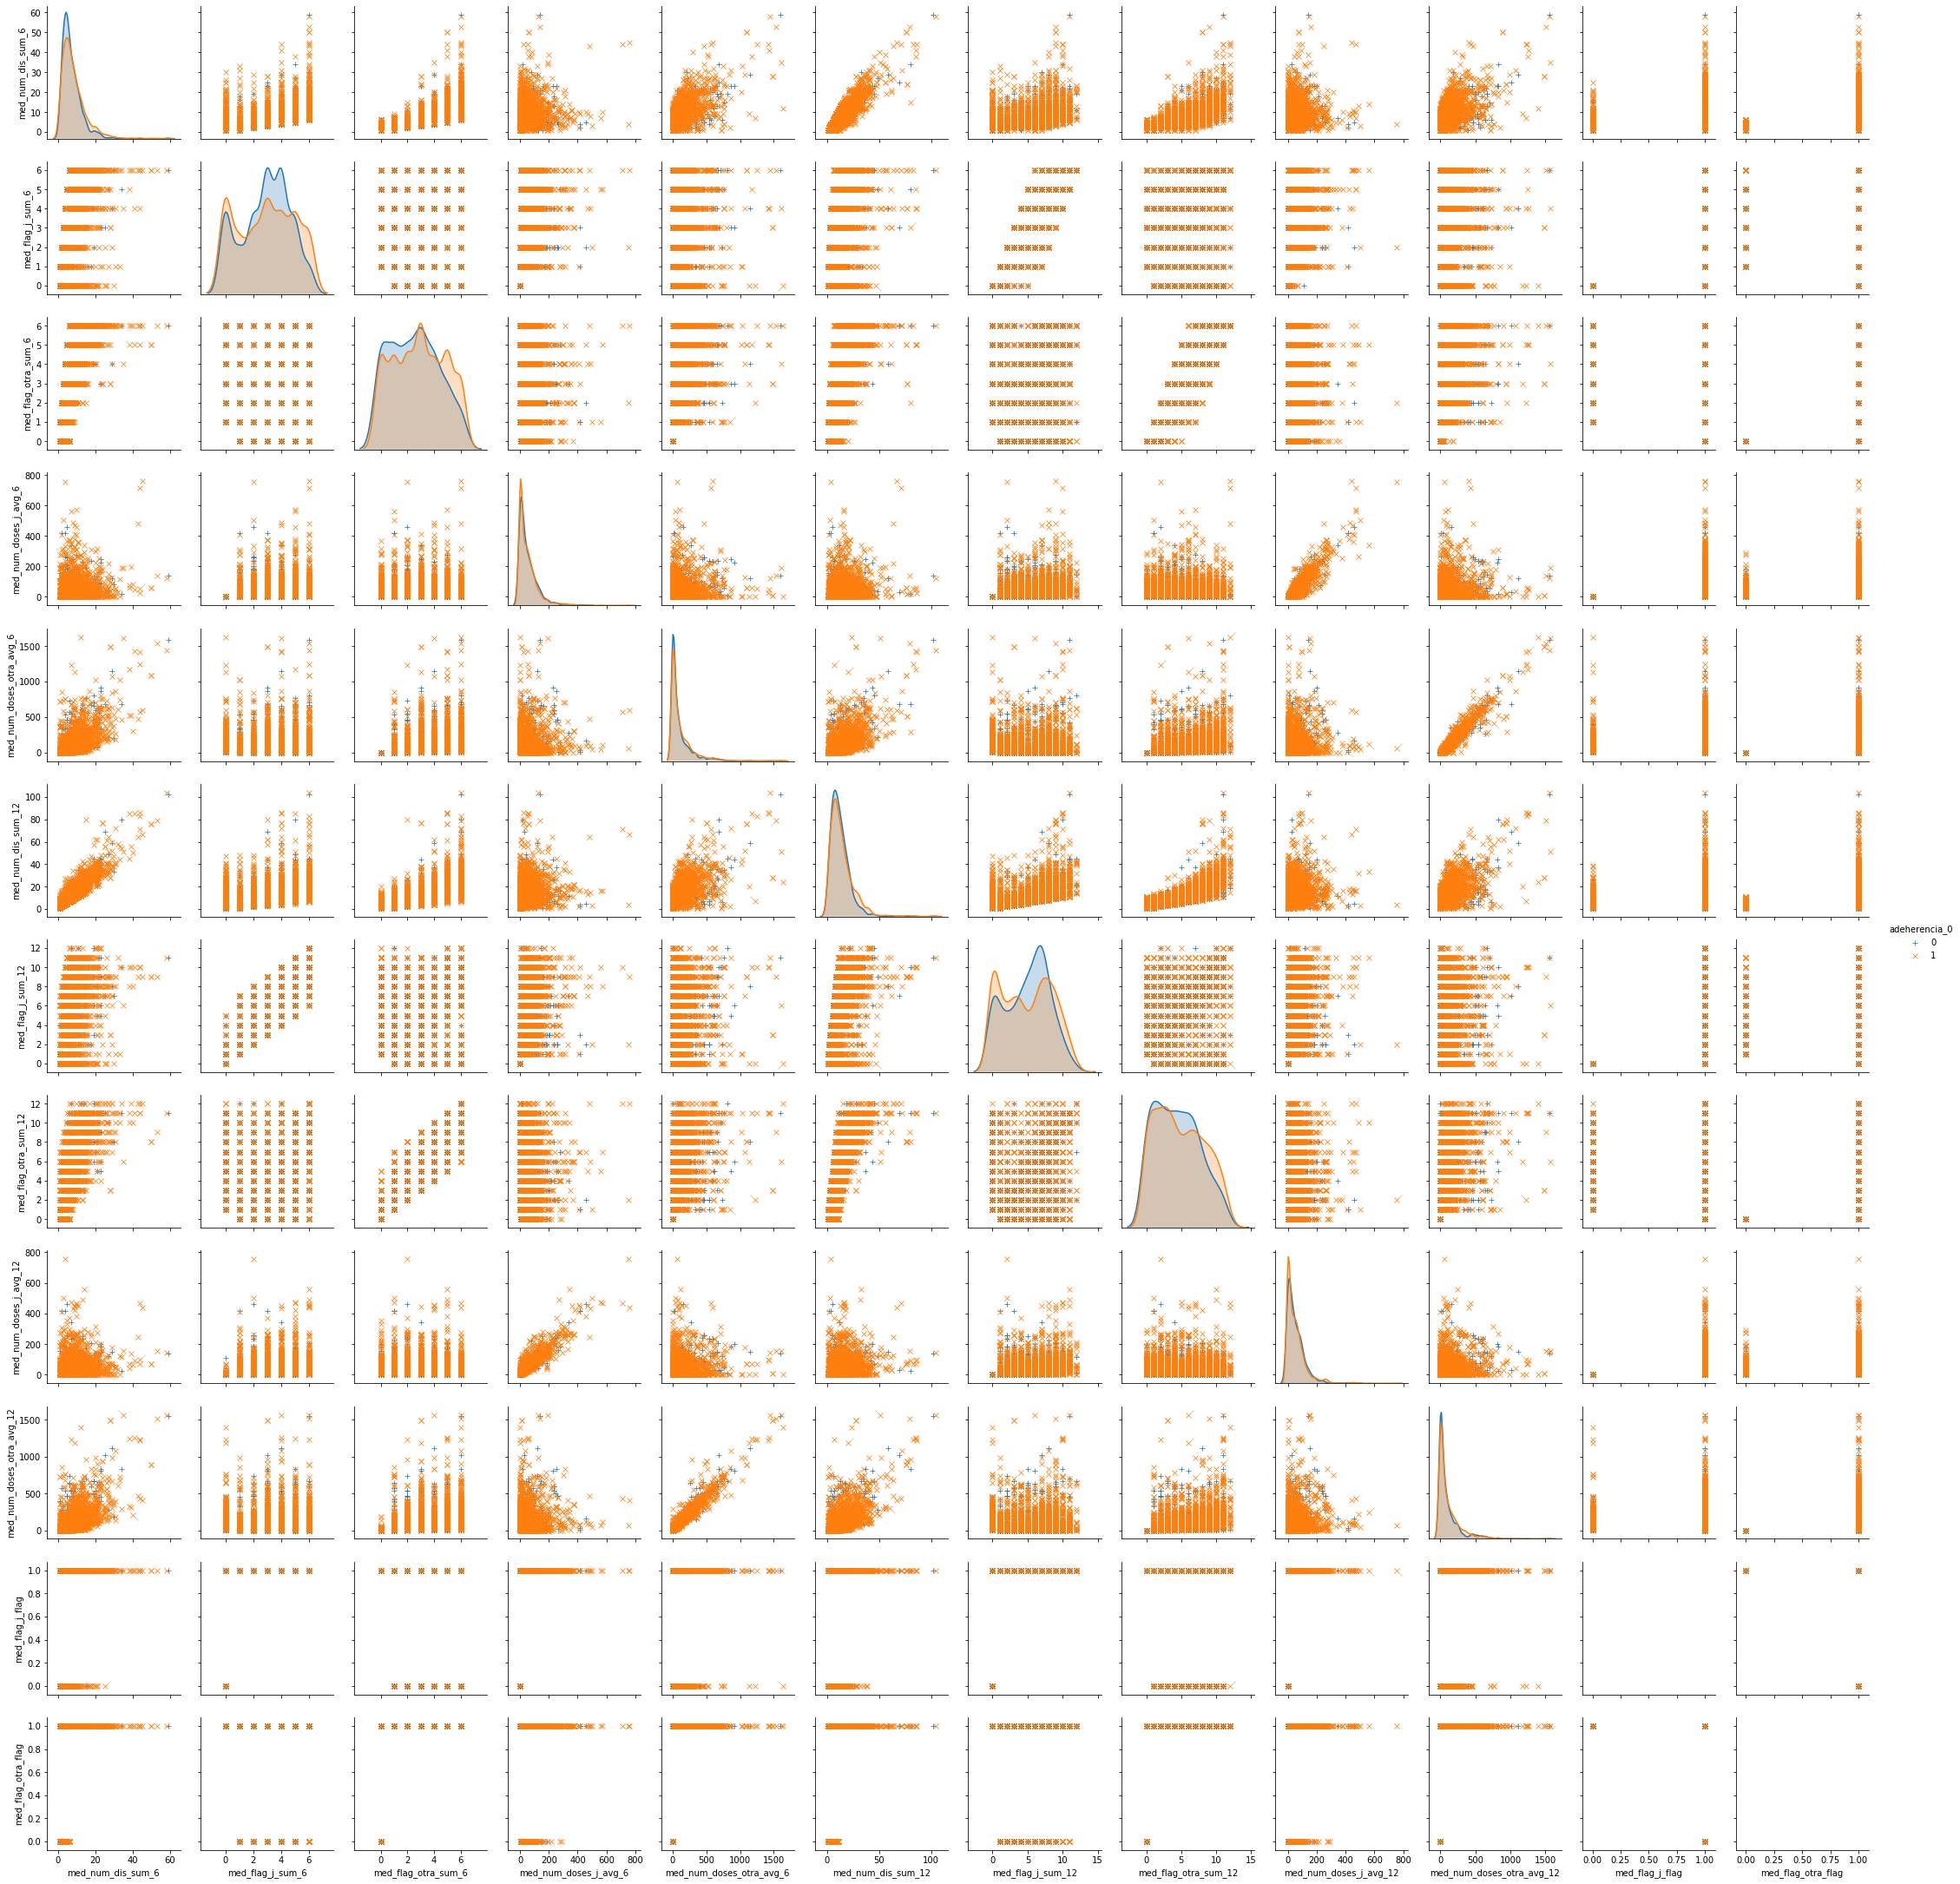

In [28]:
g = sns.pairplot(df_med.iloc[:,3:], hue="adeherencia_0", markers=["+", "x"])

In [51]:
df_med.corr()

,id,year,month,adeherencia_0,med_num_dis_sum_6,med_flag_j_sum_6,med_flag_otra_sum_6,med_num_doses_j_avg_6,med_num_doses_otra_avg_6,med_num_dis_sum_12,med_flag_j_sum_12,med_flag_otra_sum_12,med_num_doses_j_avg_12,med_num_doses_otra_avg_12,med_flag_j_flag,med_flag_otra_flag
id,1.000000,-0.014065,-0.011466,-0.004401,-0.036597,-0.055960,0.023722,-0.043613,-0.046698,-0.028082,-0.051427,0.018911,-0.046766,-0.041533,-0.069813,-0.003590
year,-0.014065,1.000000,-0.261817,0.086167,0.254231,0.111412,0.308683,-0.109035,-0.021219,0.320786,0.222234,0.388105,-0.107743,-0.040149,-0.016355,0.141650
month,-0.011466,-0.261817,1.000000,0.035946,-0.047875,0.054016,-0.057202,-0.002300,-0.028116,0.079930,0.185939,0.059191,0.024215,0.003356,0.051629,0.039642
adeherencia_0,-0.004401,0.086167,0.035946,1.000000,0.080182,0.006889,0.081053,0.017281,0.046086,0.060127,-0.008296,0.055895,0.012807,0.041153,-0.027964,0.023689
med_num_dis_sum_6,-0.036597,0.254231,-0.047875,0.080182,1.000000,0.447520,0.712121,0.169304,0.634774,0.884689,0.379737,0.644234,0.161099,0.606670,0.193545,0.257927
med_flag_j_sum_6,-0.055960,0.111412,0.054016,0.006889,0.447520,1.000000,0.099392,0.344461,0.045307,0.372094,0.865049,0.066781,0.348734,0.032808,0.579832,-0.026263
med_flag_otra_sum_6,0.023722,0.308683,-0.057202,0.081053,0.712121,0.099392,1.000000,-0.018010,0.407932,0.631880,0.078760,0.875468,-0.017229,0.389448,-0.083120,0.460881
med_num_doses_j_avg_6,-0.043613,-0.109035,-0.002300,0.017281,0.169304,0.344461,-0.018010,1.000000,0.112780,0.149175,0.310878,-0.019136,0.920527,0.111606,0.289842,0.030715
med_num_doses_otra_avg_6,-0.046698,-0.021219,-0.028116,0.046086,0.634774,0.045307,0.407932,0.112780,1.000000,0.585650,0.031820,0.382875,0.122693,0.965126,-0.011577,0.201893
med_num_dis_sum_12,-0.028082,0.320786,0.079930,0.060127,0.884689,0.372094,0.631880,0.149175,0.585650,1.000000,0.490523,0.751495,0.167042,0.612978,0.210389,0.270088


## Modulo: Inc

### Porcentaje de Nulos

In [30]:
df_inc = cargamod('inc',base,1)

In [31]:
numnull('inc',base)

,adeherencia_0,inc_con_sum_6,inc_inc_sum_6,inc_con_sum_12,inc_inc_sum_12
year,,,,,
2016,427,50.35,50.35,44.96,44.96
2017,898,34.30,34.30,23.83,23.83
2018,1002,26.05,26.05,18.96,18.96
2019,988,44.94,44.94,26.92,26.92
2020,348,85.06,85.06,59.48,59.48


In [32]:
numnull2('inc',base)

month  inc_con_sum_6  inc_inc_sum_6  inc_con_sum_12  \
year adeherencia_0                                                        
2016 0                 98          44.90          44.90           40.82   
     1                329          51.98          51.98           46.20   
2017 0                244          35.25          35.25           20.49   
     1                654          33.94          33.94           25.08   
2018 0                293          15.36          15.36            8.19   
     1                709          30.47          30.47           23.41   
2019 0                207          33.82          33.82           22.22   
     1                781          47.89          47.89           28.17   
2020 0                 30          83.33          83.33           53.33   
     1                318          85.22          85.22           60.06   

                    inc_inc_sum_12  
year adeherencia_0                  
2016 0                       40.82  
     1                       46.20  
2017 0                       20.49  
     1                       25.08  
2018 0                        8.19  
     1                       23.41  
2019 0                       22.22  
     1                       28.17  
2020 0                       53.33  
     1                       60.06

Comentario...

### Pair plot

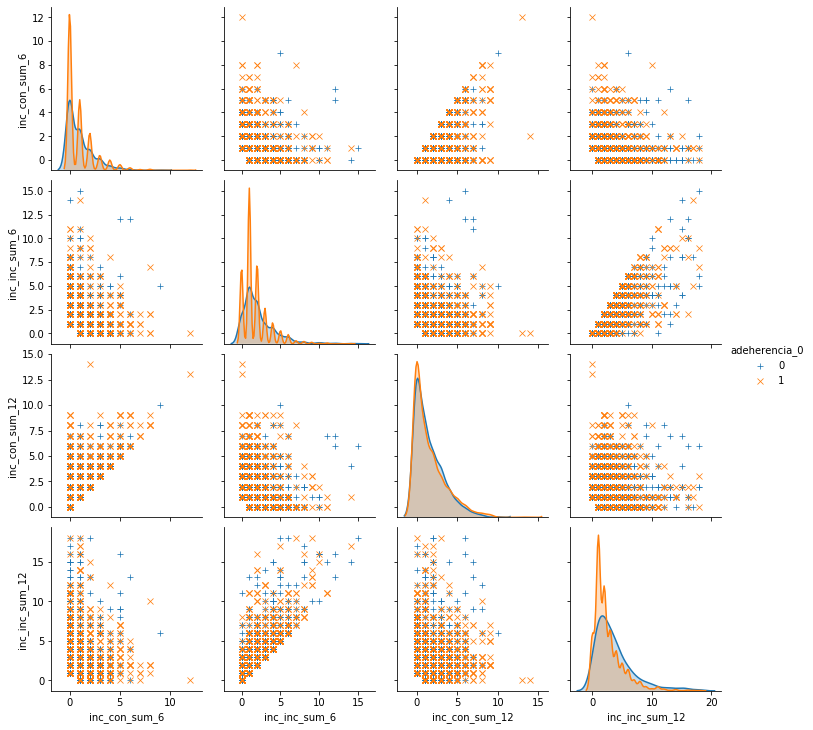

In [33]:
g = sns.pairplot(df_inc.iloc[:,3:], hue="adeherencia_0", markers=["+", "x"])

In [49]:
df_inc.corr()

,id,year,month,adeherencia_0,inc_con_sum_6,inc_inc_sum_6,inc_con_sum_12,inc_inc_sum_12
id,1.000000,-0.014065,-0.011466,-0.004401,0.015123,-0.030357,0.023024,-0.001820
year,-0.014065,1.000000,-0.261817,0.086167,0.305965,-0.278558,0.295483,-0.230560
month,-0.011466,-0.261817,1.000000,0.035946,-0.230682,-0.013655,0.072919,-0.016240
adeherencia_0,-0.004401,0.086167,0.035946,1.000000,-0.006915,-0.107339,0.015384,-0.169107
inc_con_sum_6,0.015123,0.305965,-0.230682,-0.006915,1.000000,-0.135014,0.677076,-0.047140
inc_inc_sum_6,-0.030357,-0.278558,-0.013655,-0.107339,-0.135014,1.000000,-0.073496,0.763377
inc_con_sum_12,0.023024,0.295483,0.072919,0.015384,0.677076,-0.073496,1.000000,0.046045
inc_inc_sum_12,-0.001820,-0.230560,-0.016240,-0.169107,-0.047140,0.763377,0.046045,1.000000


## Modulo: Imc

### Porcentaje de Nulos

In [35]:
df_imc = cargamod('imc',base,1)

In [36]:
numnull('imc',base)

,adeherencia_0,imc_avg_6,imc_avg_12,imc_foto
year,,,,
2016,427,38.88,29.98,72.37
2017,898,18.04,17.15,28.40
2018,1002,45.51,15.67,77.84
2019,988,70.55,61.74,85.32
2020,348,80.75,62.07,97.13


In [37]:
numnull2('imc',base)

month  imc_avg_6  imc_avg_12  imc_foto
year adeherencia_0                                        
2016 0                 98      47.96       41.84     72.45
     1                329      36.17       26.44     72.34
2017 0                244      24.59       23.36     40.98
     1                654      15.60       14.83     23.70
2018 0                293      37.20        9.56     78.84
     1                709      48.94       18.19     77.43
2019 0                207      71.50       63.77     90.34
     1                781      70.29       61.20     83.99
2020 0                 30      70.00       60.00     96.67
     1                318      81.76       62.26     97.17

Comentario

### Pair plot

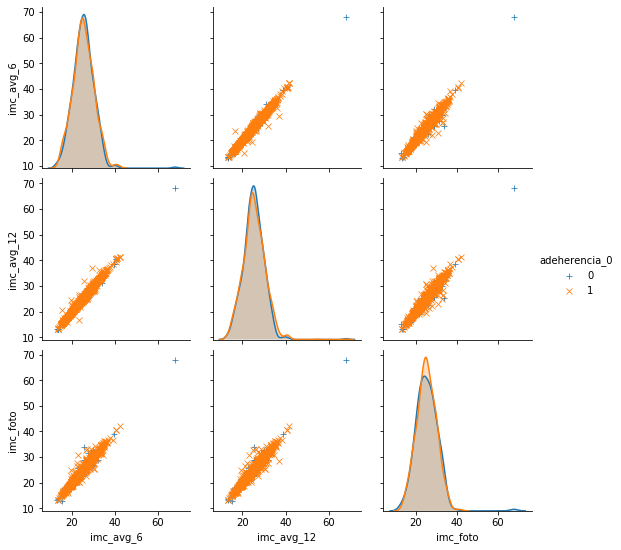

In [38]:
g = sns.pairplot(df_imc.iloc[:,3:], hue="adeherencia_0", markers=["+", "x"])

In [50]:
df_imc.corr()

,id,year,month,adeherencia_0,imc_avg_6,imc_avg_12,imc_foto
id,1.000000,-0.014065,-0.011466,-0.004401,0.042321,0.037827,0.044534
year,-0.014065,1.000000,-0.261817,0.086167,0.004210,0.023357,0.010067
month,-0.011466,-0.261817,1.000000,0.035946,0.007092,-0.001856,-0.000176
adeherencia_0,-0.004401,0.086167,0.035946,1.000000,0.002669,0.020330,-0.009870
imc_avg_6,0.042321,0.004210,0.007092,0.002669,1.000000,0.993895,0.979888
imc_avg_12,0.037827,0.023357,-0.001856,0.020330,0.993895,1.000000,0.975091
imc_foto,0.044534,0.010067,-0.000176,-0.009870,0.979888,0.975091,1.000000


# Adherencia en el tiempo

In [39]:
ejem = base[base.columns[:4]]

ejem1 = ejem.groupby(['month','adeherencia_0'])['id'].count().reset_index(name="count")

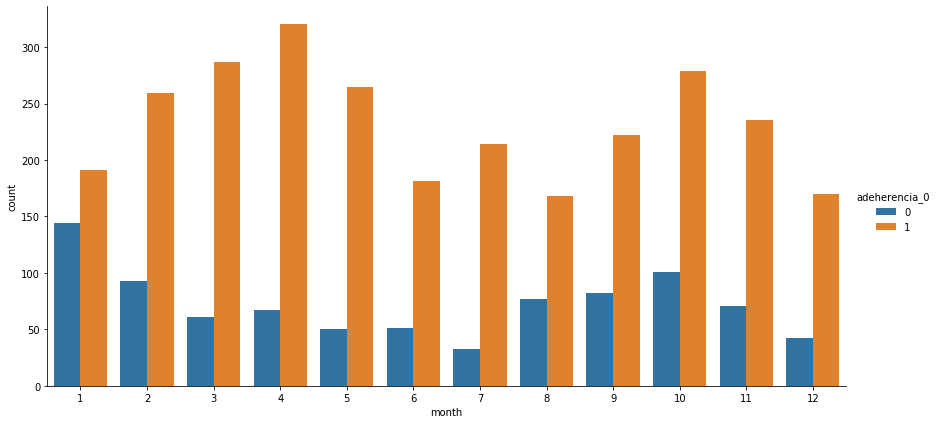

In [40]:
sns.factorplot(x='month', y='count', hue='adeherencia_0', data = ejem1, kind='bar', size=6, aspect=2)

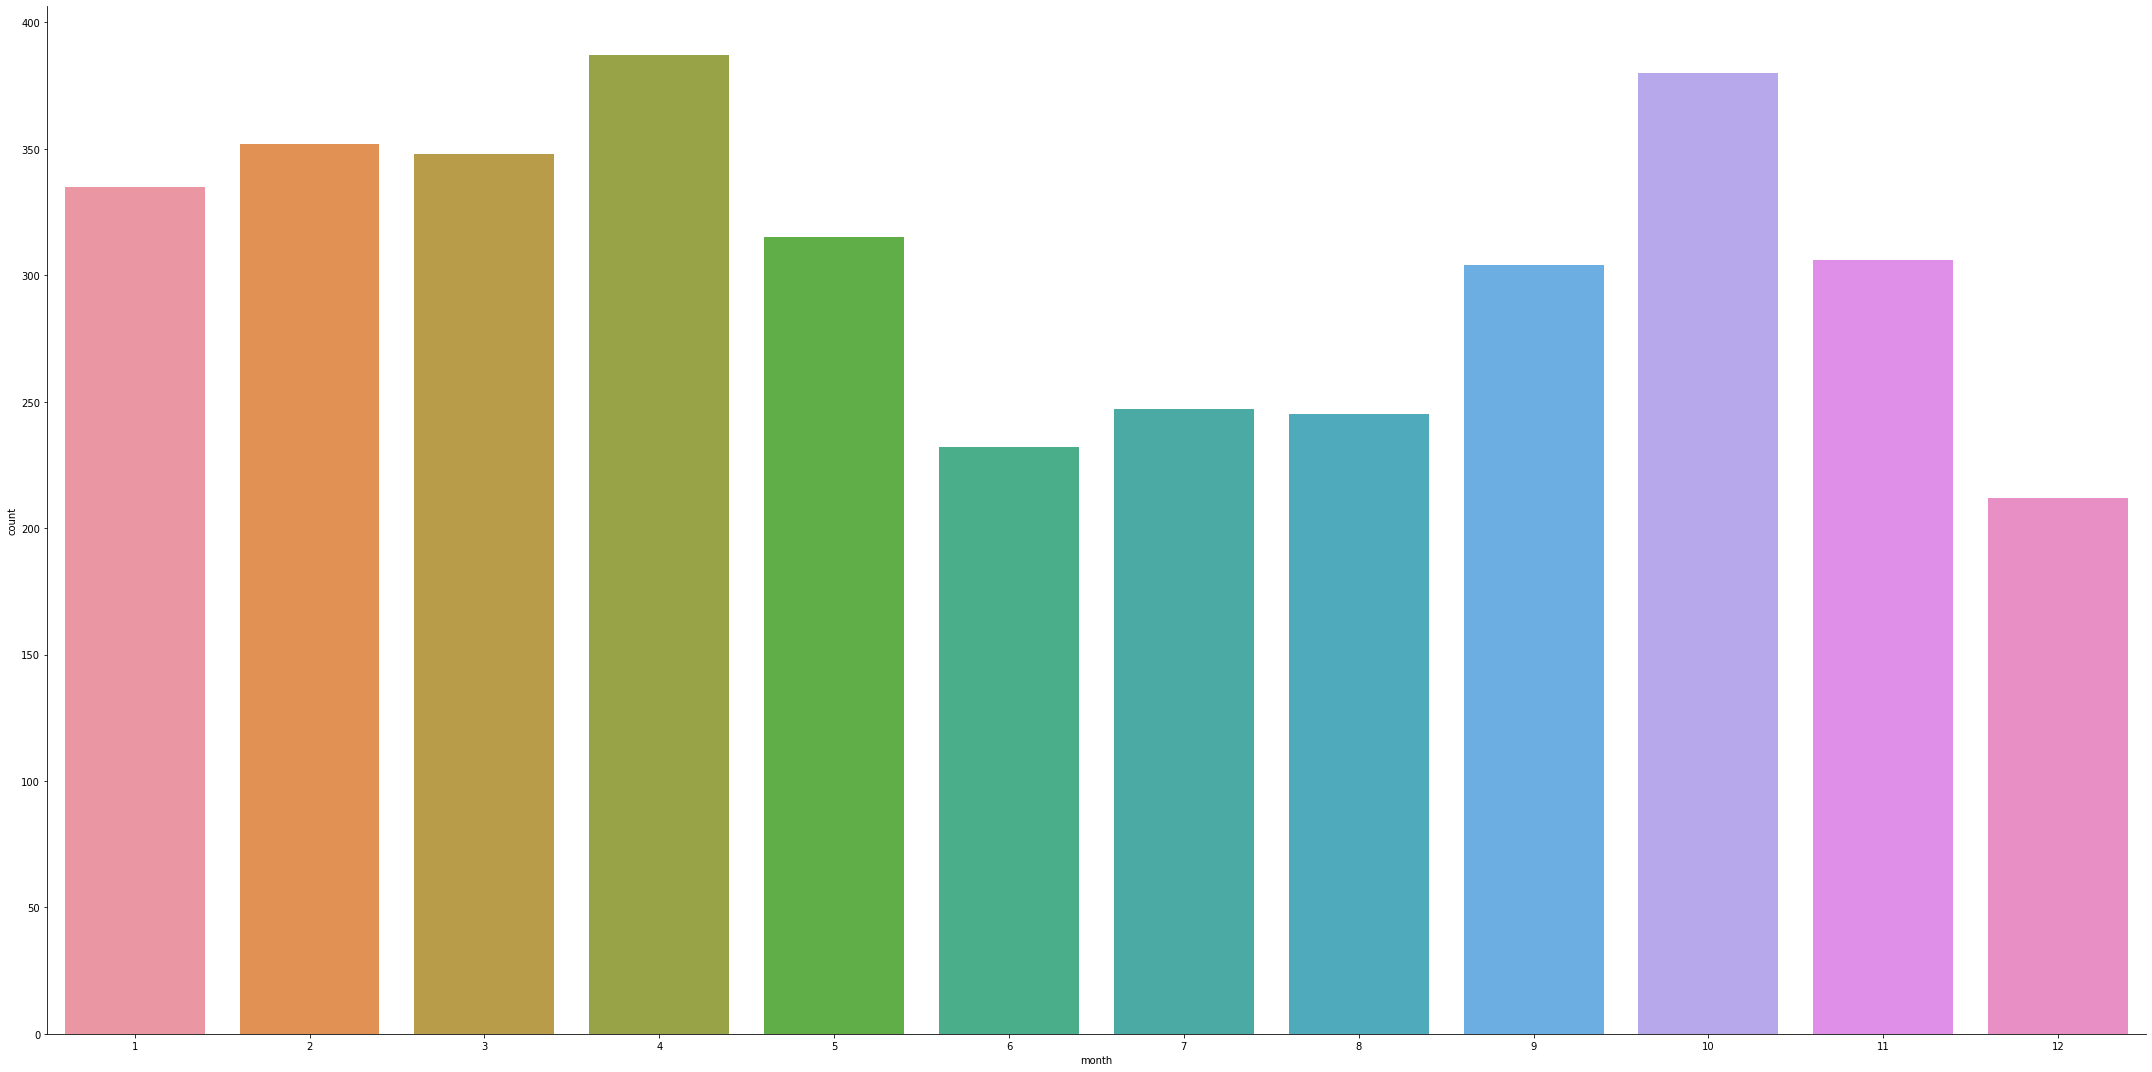

In [41]:
ejem1 = ejem.groupby(['month'])['id'].count().reset_index(name="count")
sns.factorplot(x='month', y='count', data = ejem1, kind='bar', size=15, aspect=2)

In [42]:
ejem['ym'] = 100*ejem['year']+ejem['month']
ejem1 = ejem.groupby(['ym','adeherencia_0'])['id'].count().reset_index(name="count")

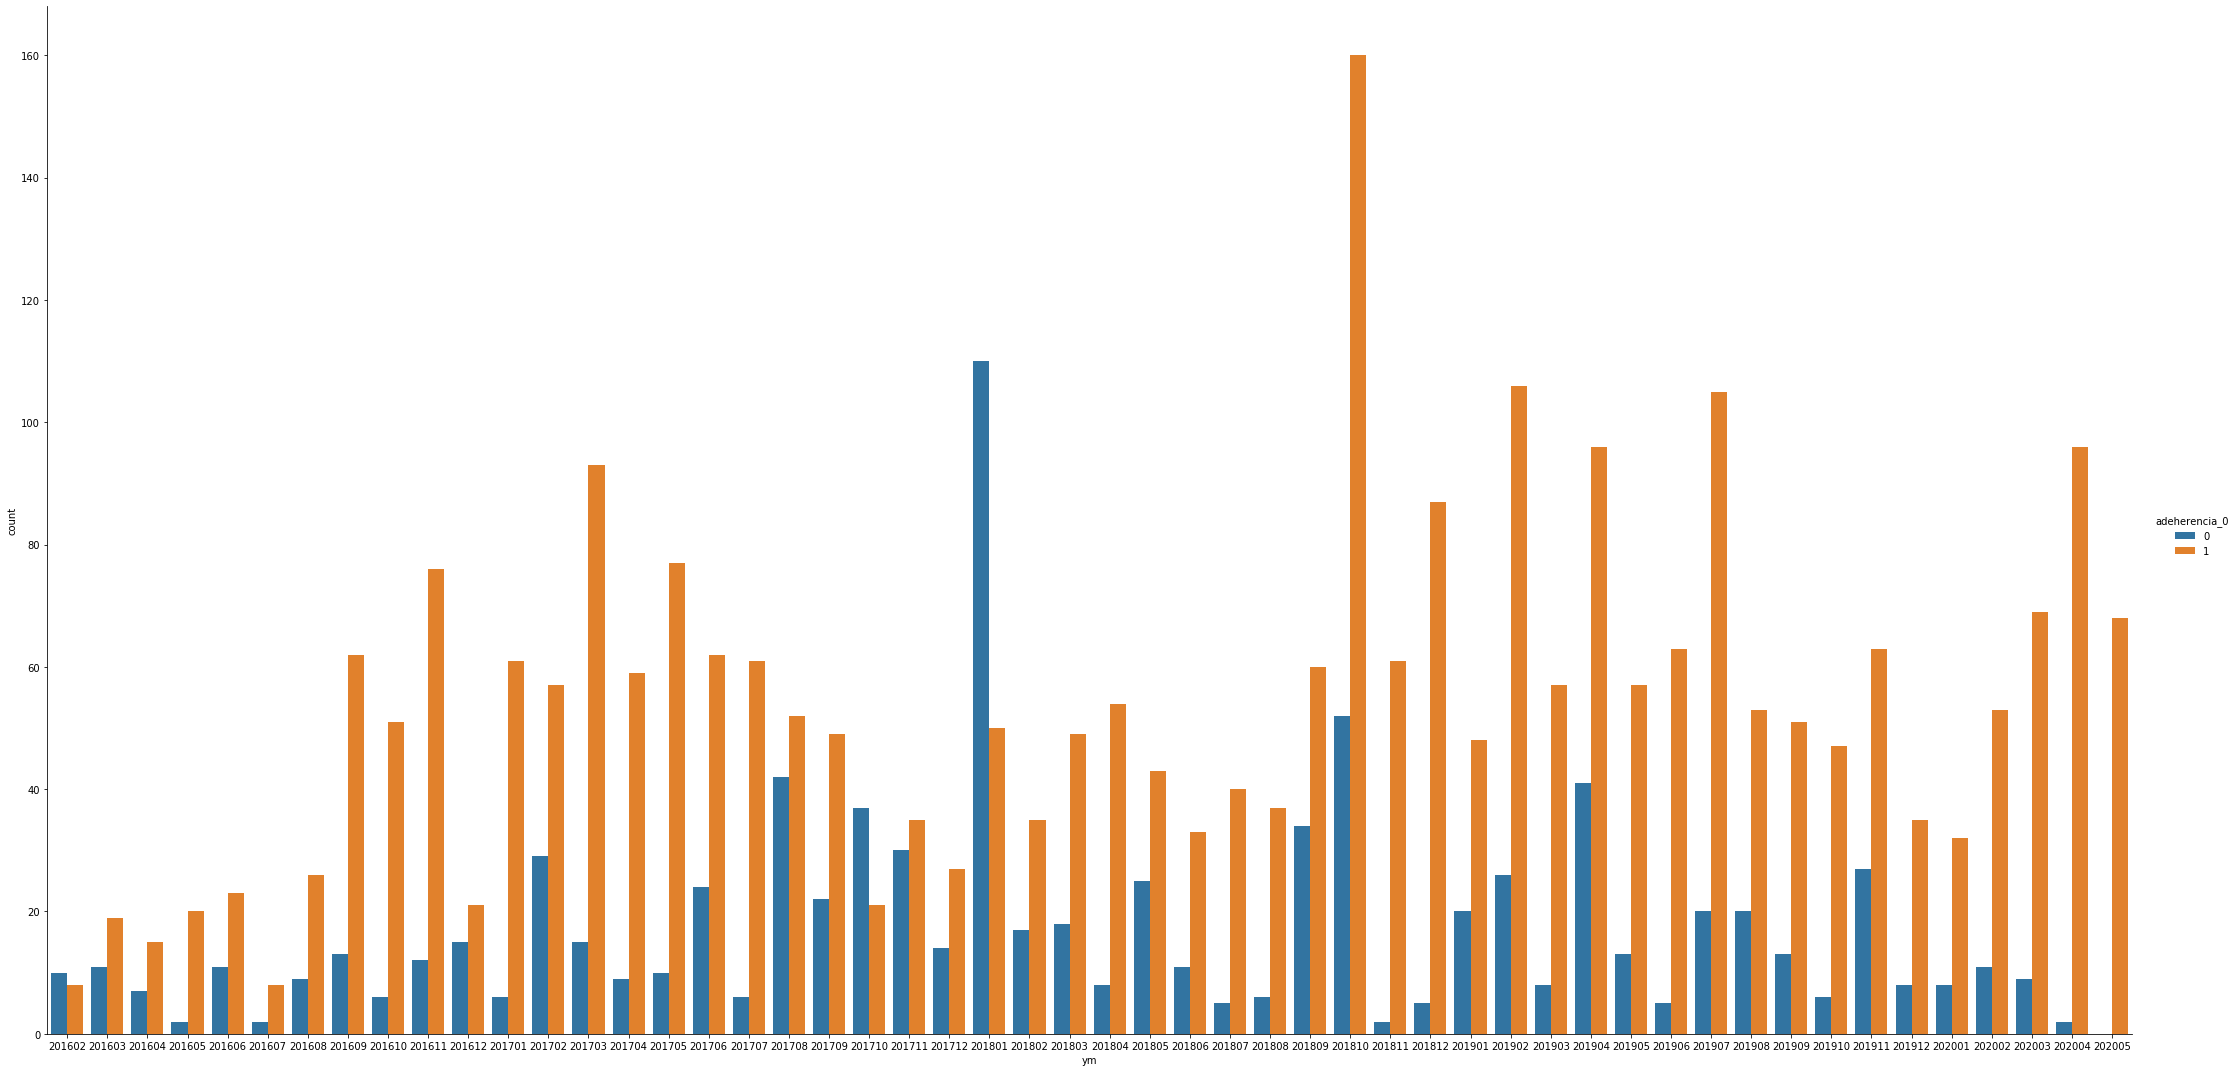

In [43]:
sns.factorplot(x='ym', y='count', hue='adeherencia_0', data = ejem1, kind='bar', size=15, aspect=2)

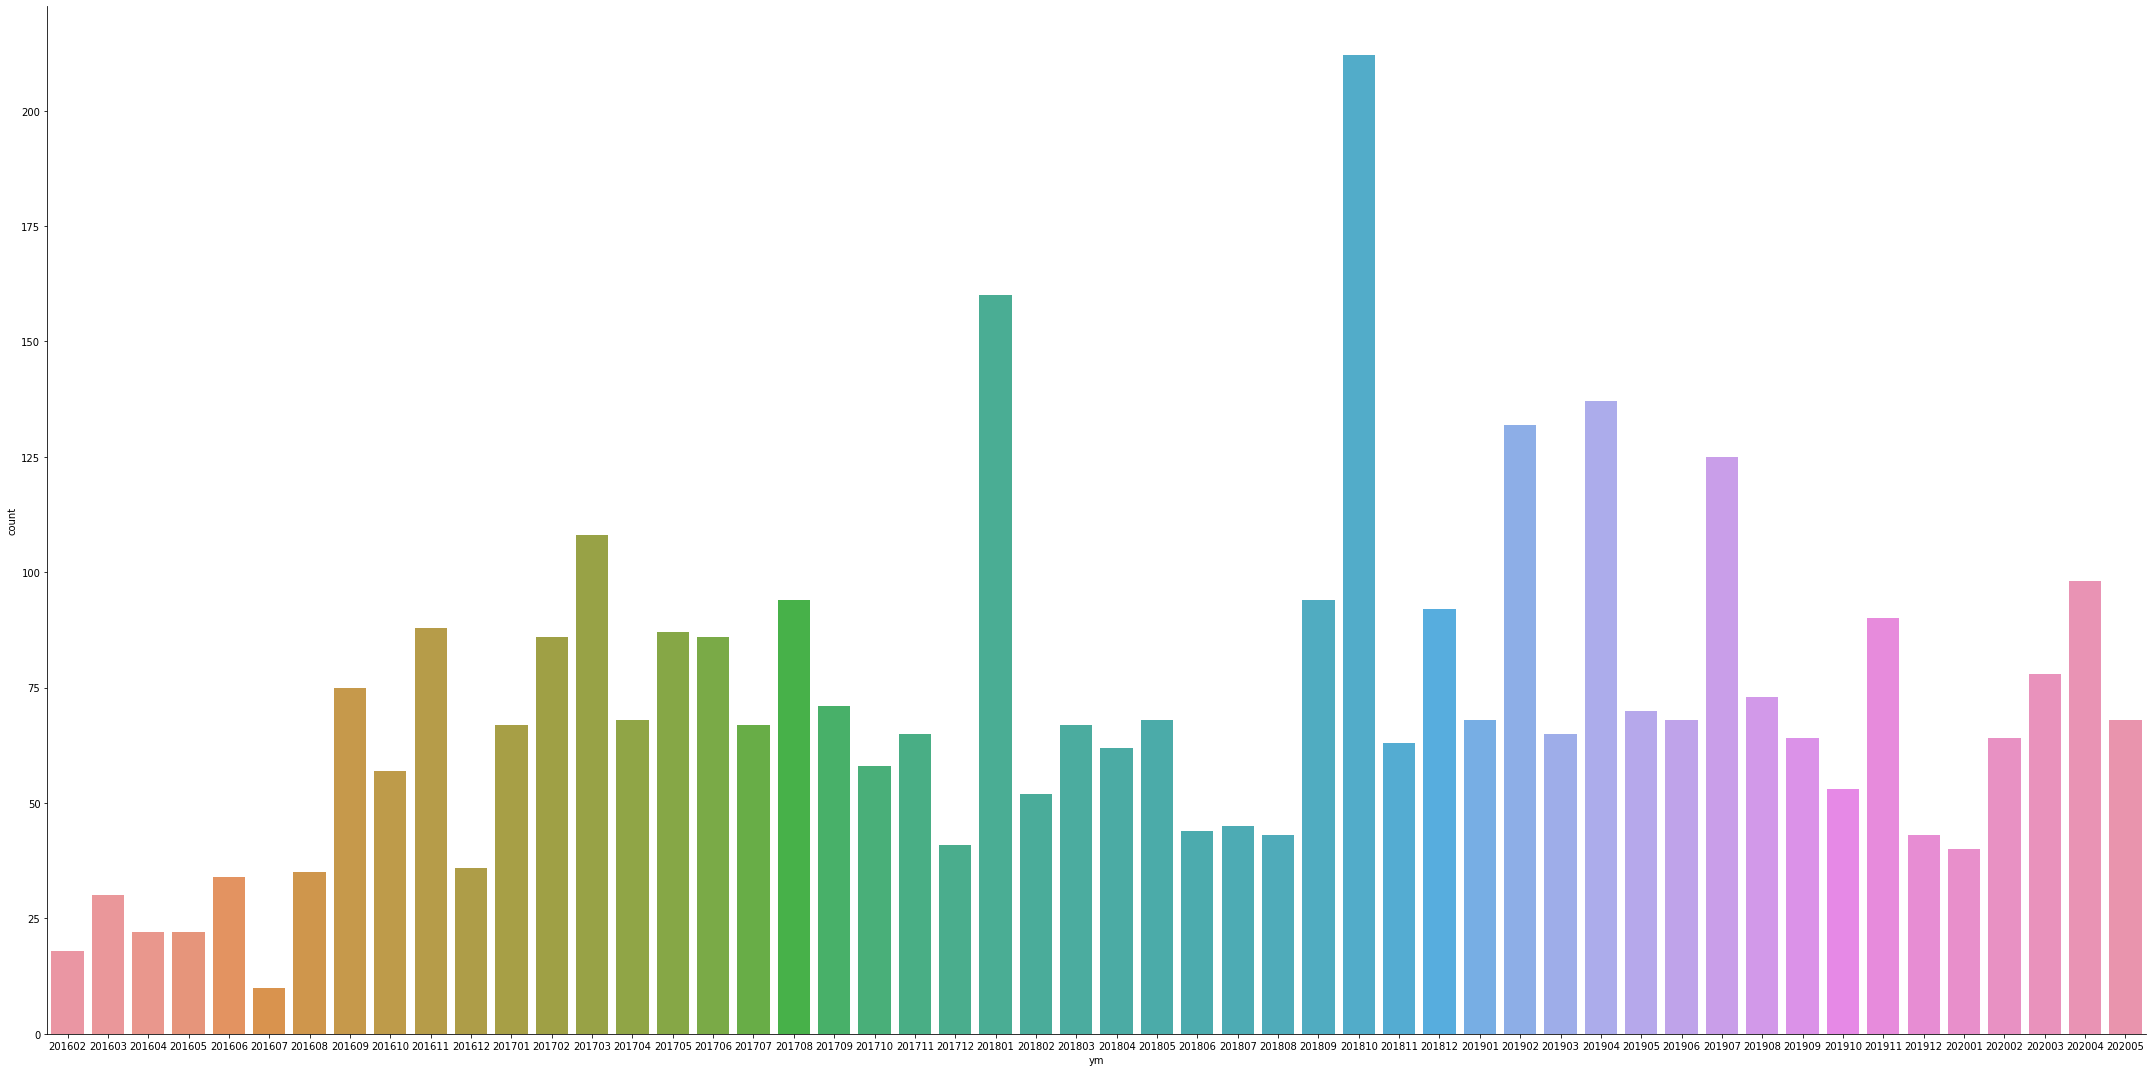

In [44]:
ejem2 = ejem.groupby(['ym'])['id'].count().reset_index(name="count")
sns.factorplot(x='ym', y='count', data = ejem2, kind='bar', size=15, aspect=2)

In [45]:
prom = []
for i in ejem2['ym']:
    aux = ejem1[ejem1['ym'] == i]['count']/ejem1[ejem1['ym'] == i]['count'].sum()
    prom.append(aux)

In [46]:
agg = pd.concat(prom, axis=0)

In [47]:
ejem1['prom'] = agg

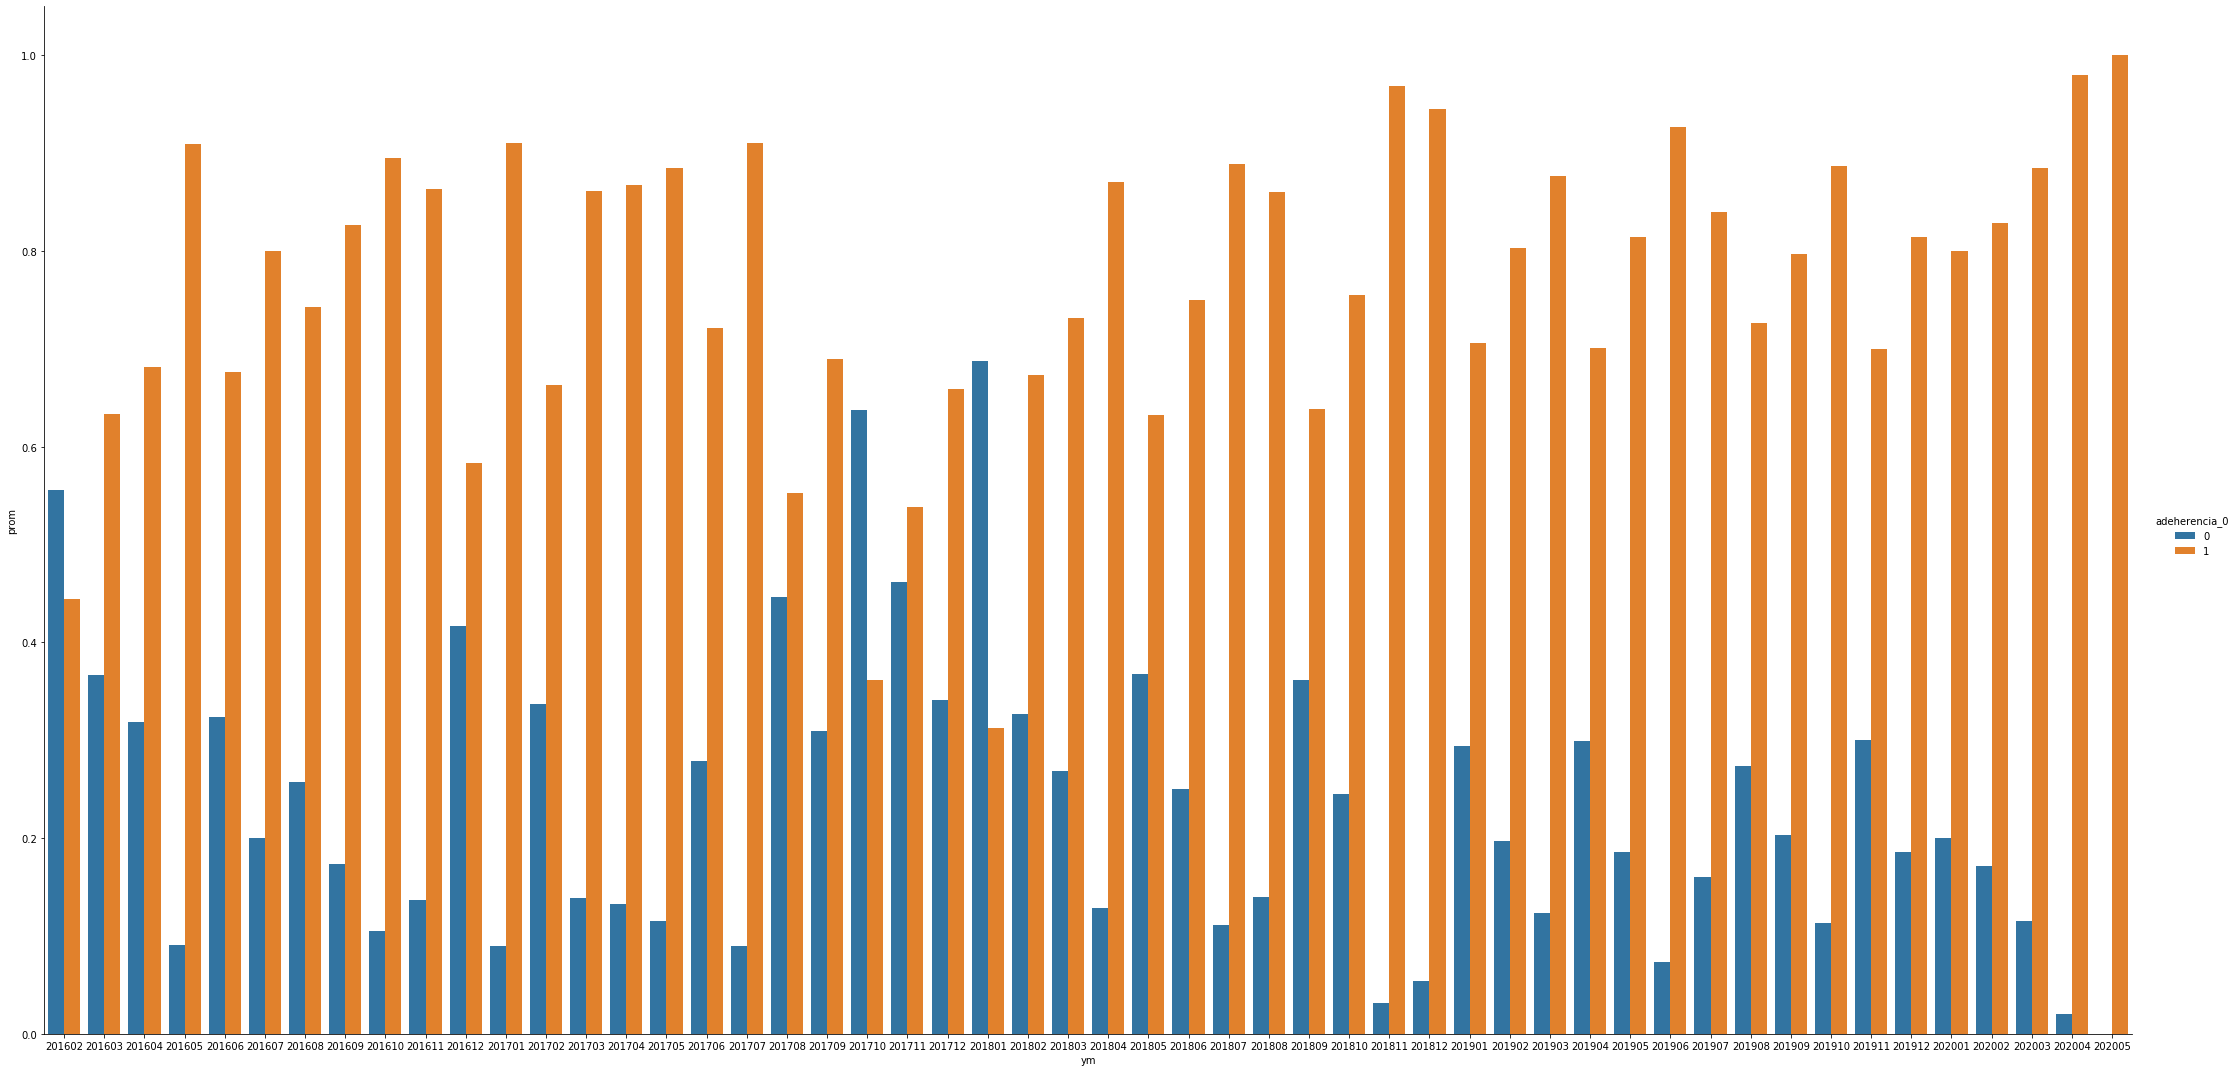

In [48]:
sns.factorplot(x='ym', y='prom', hue='adeherencia_0', data = ejem1, kind='bar', size=15, aspect=2)